Analysis for San Diego County

In [1]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime
import requests
import io

In [2]:
# load county data
counties = pd.read_csv('us-counties.csv')
counties.tail(5)

,date,county,state,fips,cases,deaths
777715,2020-11-28,Sweetwater,Wyoming,56037.0,1780,6.0
777716,2020-11-28,Teton,Wyoming,56039.0,1570,2.0
777717,2020-11-28,Uinta,Wyoming,56041.0,1037,4.0
777718,2020-11-28,Washakie,Wyoming,56043.0,416,8.0
777719,2020-11-28,Weston,Wyoming,56045.0,396,1.0


In [3]:
# find sd county
san_diego = counties[(counties['county']=='San Diego') & (counties['state']=='California')]
#san_diego.tail()

In [4]:
san_diego['datetime'] = pd.to_datetime(san_diego['date'])


In [5]:
#san_diego['datetime'] = pd.to_datetime(san_diego['date'])
#san_diego

san_diego.sort_values(by = 'datetime')
san_diego = san_diego.reset_index()

# Groupby to consolidate cases by entire region
san_diego = san_diego.groupby(["datetime"]).sum()
  
    # Sort by datetime and reset index
san_diego.sort_values(by = 'datetime')
san_diego = san_diego.reset_index()
    #wnc_group.tail
    
    # Finish datetime conversion
san_diego['datetime'] = pd.to_datetime(san_diego['datetime'])
san_diego['day'] = san_diego['datetime'].map(lambda x: x.day)
san_diego['month'] = san_diego['datetime'].map(lambda x: x.month)
san_diego['year'] = san_diego['datetime'].map(lambda x: x.year)

    # Now create new column for growth rate
    #us['growth_rate'] = us['cases'].pct_change()
    # Drop null value
san_diego = san_diego.dropna()
san_diego = san_diego
#san_diego.tail(10)


In [6]:
san_diego['growth_rate'] = san_diego['deaths'].pct_change()

In [7]:
san_diego

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,2020-02-10,118,6073.0,1,0.0,10,2,2020,NaN
1,2020-02-11,128,6073.0,1,0.0,11,2,2020,NaN
2,2020-02-12,138,6073.0,1,0.0,12,2,2020,NaN
3,2020-02-13,149,6073.0,1,0.0,13,2,2020,NaN
4,2020-02-14,160,6073.0,1,0.0,14,2,2020,NaN
...,...,...,...,...,...,...,...,...,...
288,2020-11-24,761711,6073.0,74424,984.0,24,11,2020,0.016529
289,2020-11-25,764957,6073.0,75368,988.0,25,11,2020,0.004065
290,2020-11-26,768204,6073.0,75370,988.0,26,11,2020,0.000000
291,2020-11-27,771450,6073.0,78222,996.0,27,11,2020,0.008097


In [8]:
sd = san_diego.drop([273])

In [10]:
sd

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,2020-02-10,118,6073.0,1,0,10,2,2020,NaN
1,2020-02-11,128,6073.0,1,0,11,2,2020,NaN
2,2020-02-12,138,6073.0,1,0,12,2,2020,NaN
3,2020-02-13,149,6073.0,1,0,13,2,2020,NaN
4,2020-02-14,160,6073.0,1,0,14,2,2020,NaN
...,...,...,...,...,...,...,...,...,...
271,2020-11-07,706539,6073.0,59719,908,7,11,2020,0.001103
272,2020-11-08,709783,6073.0,60232,908,8,11,2020,0.000000
274,2020-11-10,716271,6073.0,61116,915,10,11,2020,-0.024520
275,2020-11-11,719515,6073.0,61148,915,11,11,2020,0.000000


In [18]:
sd.diff()

,datetime,index,fips,cases,deaths,day,month,year,growth_rate
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 days,10.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,1 days,10.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,1 days,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,1 days,11.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
288,1 days,3246.0,0.0,1546.0,16.0,1.0,0.0,0.0,0.016529
289,1 days,3246.0,0.0,944.0,4.0,1.0,0.0,0.0,-0.012464
290,1 days,3247.0,0.0,2.0,0.0,1.0,0.0,0.0,-0.004065
291,1 days,3246.0,0.0,2852.0,8.0,1.0,0.0,0.0,0.008097


In [9]:
# Run model predicting cases

def make_models():
    ''' function to run deaths model'''
    # Make the model
    SD_model = LinearRegression()
    
    # Assign the features and the target
    X_Us = sd[["day", "month", "year"]]
    y_Us = sd[["deaths"]]
    
    # Split the data for training and testing
    X_train_Us, X_test_Us, y_train_Us, y_test_Us = train_test_split(X_Us, y_Us, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    SD_model.fit(X_train_Us, y_train_Us)
    SD_model.score(X_test_Us, y_test_Us)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    #election_day = {"day": [20], "month": [11], "year": [2020]}
    predict_weeks = {"day": [20, 27, 4, 11, 18, 25], "month": [11, 11, 12, 12, 12, 12], "year": [2020, 2020, 2020, 2020, 2020, 2020]}
    
    
    predict_weeks = pd.DataFrame(predict_weeks)
    #predict_election = pd.DataFrame(election_day)
    predict_weeks["datetime"] = pd.to_datetime((predict_weeks.year*10000 + predict_weeks.month*100+predict_weeks.day).apply(str),format='%Y%m%d')   


    # Predict with the model
    predictions = SD_model.predict(predict_weeks[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_weeks["predicted_deaths"] = predictions
    predict_weeks["predicted_deaths"] = predict_weeks['predicted_deaths'].astype('float')
    
    return predict_weeks

make_models()

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,971.070714
1,27,11,2020,2020-11-27,997.917922
2,4,12,2020,2020-12-04,1028.693853
3,11,12,2020,2020-12-11,1055.541060
4,18,12,2020,2020-12-18,1082.388268
5,25,12,2020,2020-12-25,1109.235475


In [10]:
# assign modle output to variable
weeks_cases = make_models()

In [11]:
weeks_cases

,day,month,year,datetime,predicted_deaths
0,20,11,2020,2020-11-20,971.070714
1,27,11,2020,2020-11-27,997.917922
2,4,12,2020,2020-12-04,1028.693853
3,11,12,2020,2020-12-11,1055.541060
4,18,12,2020,2020-12-18,1082.388268
5,25,12,2020,2020-12-25,1109.235475


deaths

In [12]:
weeks_deaths = make_models()

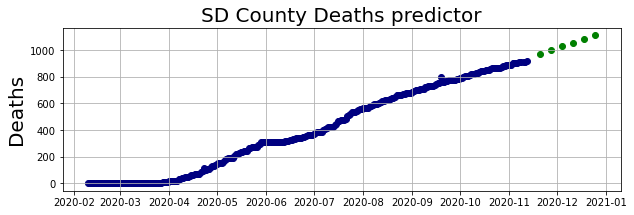

In [16]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (10, 3))
plt.scatter(weeks_deaths['datetime'],weeks_deaths['predicted_deaths'],c='g',)
plt.scatter(sd['datetime'],sd['deaths'],c='#000080',)
plt.grid(True)
plt.title('SD County Deaths predictor', fontsize = 20)
plt.ylabel('Deaths', fontsize = 20)
plt.show()

# CHECKING PREDICTIONS

In [ ]:
# updated dataset to find actual numbers
# upload raw csv
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#call sample
# Reading the downloaded content and turning it into a pandas dataframe

# now find san diego county
# find hennepin county and call sample
checking = df[(df['county']=='San Diego') & (df['state']=='California')]
checking.tail(29)


In [14]:
weeks_deaths

actual = [960, 996, 1047, 1137, 1253, 1382] 
#actual = [1047, 1137, 1253, 1382]
  
# Using 'Address' as the column name 
# and equating it to the list 
weeks_deaths['actual_deaths'] = actual
weeks_deaths

,day,month,year,datetime,predicted_deaths,actual_deaths
0,20,11,2020,2020-11-20,971.070714,960
1,27,11,2020,2020-11-27,997.917922,996
2,4,12,2020,2020-12-04,1028.693853,1047
3,11,12,2020,2020-12-11,1055.541060,1137
4,18,12,2020,2020-12-18,1082.388268,1253
5,25,12,2020,2020-12-25,1109.235475,1382


In [15]:
#extract nedded columns
weeks_deaths[['datetime','predicted_deaths','actual_deaths']]

,datetime,predicted_deaths,actual_deaths
0,2020-11-20,971.070714,960
1,2020-11-27,997.917922,996
2,2020-12-04,1028.693853,1047
3,2020-12-11,1055.541060,1137
4,2020-12-18,1082.388268,1253
5,2020-12-25,1109.235475,1382


In [16]:
weeks_deaths.set_index('datetime')

,day,month,year,predicted_deaths,actual_deaths
datetime,,,,,
2020-11-20,20,11,2020,971.070714,960
2020-11-27,27,11,2020,997.917922,996
2020-12-04,4,12,2020,1028.693853,1047
2020-12-11,11,12,2020,1055.541060,1137
2020-12-18,18,12,2020,1082.388268,1253
2020-12-25,25,12,2020,1109.235475,1382


# Visulize Predictions

In [40]:
# extract needed columns
plot = weeks_deaths[['datetime','predicted_deaths','actual_deaths']]


# add columns with date in non datetime form
plot['date'] = ('11-20','11-27','12-4','12-7','12-18','12-25')
plot
# set date as index
#plot.set_index('date')

,datetime,predicted_deaths,actual_deaths,date
0,2020-11-20,971.070714,960,11-20
1,2020-11-27,997.917922,996,11-27
2,2020-12-04,1028.693853,1047,12-4
3,2020-12-11,1055.541060,1137,12-7
4,2020-12-18,1082.388268,1253,12-18
5,2020-12-25,1109.235475,1382,12-25


In [41]:
plot = plot[['date','predicted_deaths','actual_deaths']]

In [40]:
# remove datetime object
 new_plot = [['date','predicted_deaths','actual_deaths']]

In [42]:
plot

,date,predicted_deaths,actual_deaths
0,11-20,971.070714,960
1,11-27,997.917922,996
2,12-4,1028.693853,1047
3,12-7,1055.541060,1137
4,12-18,1082.388268,1253
5,12-25,1109.235475,1382


In [43]:
# set datetime as index
plot =plot.set_index('date')

In [44]:
plot

,predicted_deaths,actual_deaths
date,,
11-20,971.070714,960
11-27,997.917922,996
12-4,1028.693853,1047
12-7,1055.541060,1137
12-18,1082.388268,1253
12-25,1109.235475,1382


([<matplotlib.axis.XTick at 0x1c6d0ba3070>,
 [Text(0, 0, '11-20'),
  Text(0, 0, '11-27'),
  Text(0, 0, '12-4'),
  Text(0, 0, '12-7'),
  Text(0, 0, '12-18'),
  Text(0, 0, '12-25')])

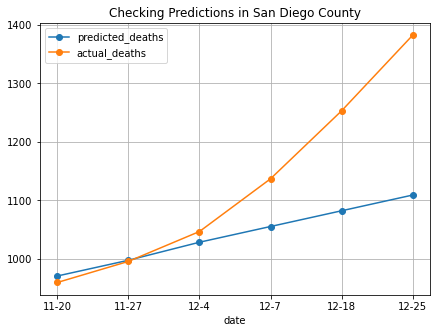

In [45]:
#plt.figure();
plot.plot(marker='o',grid=True,figsize=(7,5),title= "Checking Predictions in San Diego County")
plt.xticks(range(len(plot.index)), plot.index)

#plt.xticks(range(len(sd.index)), sd.index)



In [36]:
# check types
weeks_deaths.dtypes

day                          int64
month                        int64
year                         int64
datetime            datetime64[ns]
predicted_deaths           float64
actual_deaths               object
dtype: object

In [26]:
weeks_deaths['datetime'].astype('object')

0    2020-11-20 00:00:00
1    2020-11-27 00:00:00
2    2020-12-04 00:00:00
3    2020-12-11 00:00:00
4    2020-12-18 00:00:00
5    2020-12-25 00:00:00
Name: datetime, dtype: object

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


d = {'date':[' November 21st','November 28th'],'predicted_deaths':[973,1002],'actual_deaths':[960,996]}

sd = pd.DataFrame(data=d)
sd=sd[['date','predicted_deaths','actual_deaths']]
sd = sd.set_index('date')

In [7]:
# make df for predicted deaths
predict_weeks = {"day": [4, 11, 18, 25], "month": [ 12, 12, 12, 12], "year": [ 2020, 2020, 2020, 2020]}

In [ ]:
actual = [1047, 1137, 1253, 1382] 

([<matplotlib.axis.XTick at 0x1c6d085efa0>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5')])

<Figure size 432x288 with 0 Axes>

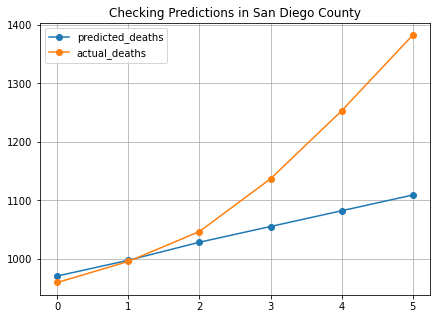

In [29]:
plt.figure();
plot.plot(marker='o',grid=True,figsize=(7,5),title= "Checking Predictions in San Diego County")
plt.xticks(range(len(plot.index)), plot.index)

In [18]:
#weeks_deaths.plot()

weeks_deaths.datetime = pd.to_datetime(weeks_deaths.datetime)

print(weeks_deaths.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   day               6 non-null      int64         
 1   month             6 non-null      int64         
 2   year              6 non-null      int64         
 3   datetime          6 non-null      datetime64[ns]
 4   predicted_deaths  6 non-null      float64       
 5   actual_deaths     6 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 416.0+ bytes
None


In [21]:
weeks_deaths=weeks_deaths


# # CHECKING PREDICTIONS